In [25]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# good_subjects_list.remove('NDARRM073JKA')#xcp straggler


In [4]:
good_subjects_list[18]


#sbatch --array=0-$len%100 --constraint=rocky8 /om2/user/jsmentch/hbn_24/ss_func_xcpd.sh /nese/mit/group/sig/projects/hbn/hbn_bids sub-NDARRM073JKA

'NDARRM073JKA'

In [24]:
sub='NDARRM073JKA'
%run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r

running subject NDARRM073JKA
loaded brain data
run ridgecv
No value was passed to args.bootstrap
MEAN test R^2 Score:  0.07
6.067603588104248
saving results
MEAN train R^2 Score:  0.10


In [7]:
for sub in good_subjects_list:
    #print(f'SUB-{sub} NO V1******************')
    %run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r
    #print(f'SUB-{sub} WITH V1****************++++++')
    #%run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r -v
    print(f'****************++++++****************++++++****************++++++*************')

#python pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


running subject NDARWW005GCU
loaded brain data
run ridgecv
No value was passed to args.bootstrap
MEAN test R^2 Score:  0.04
5.171626091003418
saving results
MEAN train R^2 Score:  0.09
****************++++++****************++++++****************++++++*************
running subject NDARLA226ADX
loaded brain data
run ridgecv
No value was passed to args.bootstrap
MEAN test R^2 Score:  0.10
5.168727874755859
saving results
MEAN train R^2 Score:  0.10
****************++++++****************++++++****************++++++*************
running subject NDARYL124VM6
loaded brain data
run ridgecv
No value was passed to args.bootstrap
MEAN test R^2 Score:  0.01
5.2733848094940186
saving results
MEAN train R^2 Score:  0.02
****************++++++****************++++++****************++++++*************
running subject NDAREM731BYM
loaded brain data
run ridgecv
No value was passed to args.bootstrap
MEAN test R^2 Score:  0.12
5.744139671325684
saving results
MEAN train R^2 Score:  0.17
****************+++

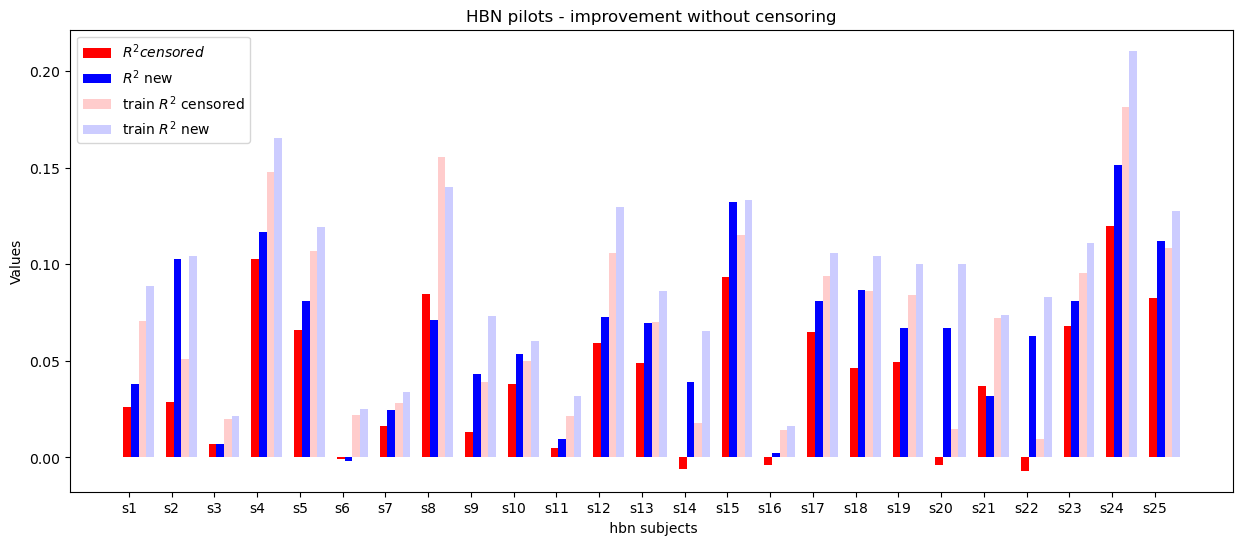

/tmp/ipykernel_1540243/1322389207.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new'])


[Text(0, 0, '$R^2 censored$'),
 Text(1, 0, '$R^2$ new'),
 Text(2, 0, 'train $R^2$ censored'),
 Text(3, 0, 'train $R^2$ new')]

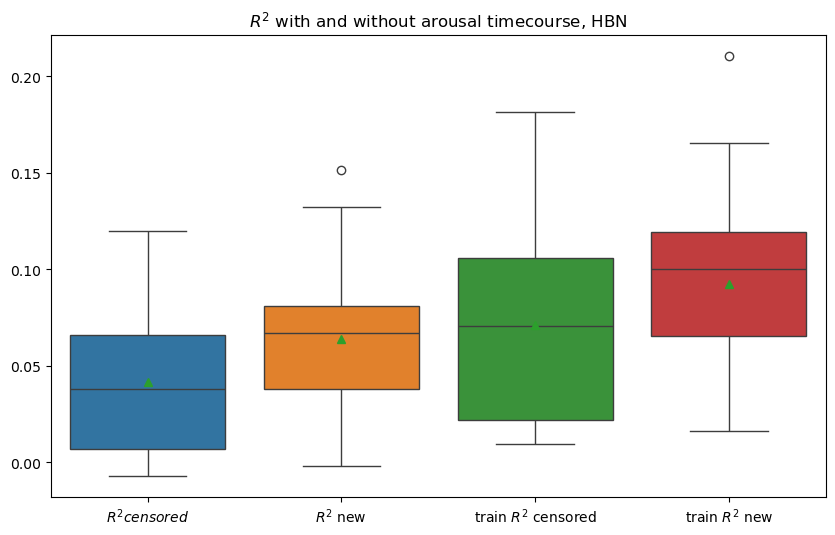

In [26]:
r2_censored=[]
r2_new=[]
r2_censored_train=[]
r2_new_train=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2_censored.append(np.mean(loaded['stacked_r2s']))
    r2_censored_train.append(np.mean(loaded['train_r2_list']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2_new.append(np.mean(loaded['stacked_r2s']))
    r2_new_train.append(np.mean(loaded['train_r2_list']))




# Number of groups
N = len(r2_censored)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[r2_censored,r2_new,r2_censored_train,r2_new_train]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new']
# Create bars for each list
alphas=[1,1,0.2,0.2]
colors=['r','b','red','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title('HBN pilots - improvement without censoring')
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(f'$R^2$ with and without arousal timecourse, HBN')
ax.set_xticklabels(['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new'])